### Objetivo
Este notebook tem como objetivo apresentar uma análise visual comparativa entre o modelo base e o modelo refinado, com foco em performance e estabilidade.


In [1]:
import sys
import os

ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(ROOT_DIR)

import pandas as pd
import numpy as np

from src.modelagem import treinar_e_avaliar
from src.utils import salvar_objeto
from src.utils import carregar_objeto


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
modelos     = carregar_objeto("../models/modelos.pkl")
resultados  = carregar_objeto("../artifacts/resultados.pkl")
psi         = carregar_objeto("../artifacts/psi.pkl")


In [ ]:
df_metricas = pd.DataFrame({
    "Modelo_Base": resultados["Modelo_Base"].loc["Teste"],
    "Modelo_Refinado": resultados["Modelo_Refinado"].loc["Teste"]
})


In [20]:
resultados

{'Modelo_Base':                 AUC        KS      Gini
 Treino     0.800321  0.444877  0.600642
 Validação  0.749871  0.377606  0.499741
 Teste      0.700703  0.314798  0.401406,
 'Modelo_Refinado':                 AUC        KS      Gini
 Treino     0.799971  0.438329  0.599941
 Validação  0.751490  0.382255  0.502981
 Teste      0.700946  0.306701  0.401891}

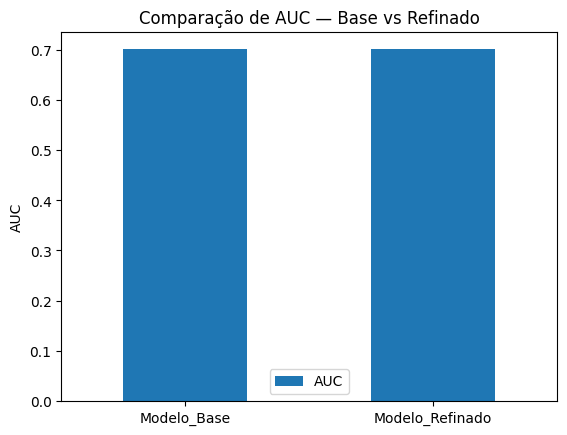

In [10]:
df_metricas.T[["AUC"]].plot(kind="bar")
plt.title("Comparação de AUC — Base vs Refinado")
plt.ylabel("AUC")
plt.xticks(rotation=0)
plt.show()



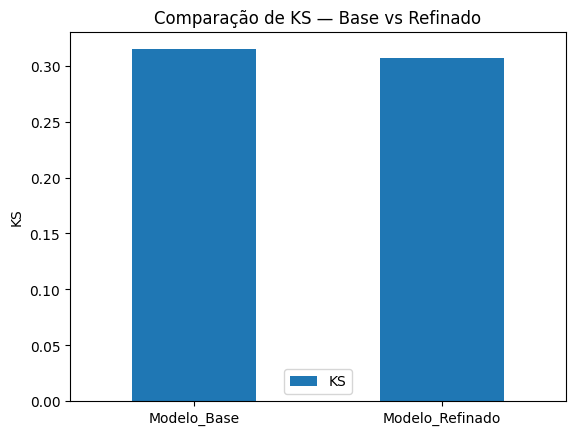

In [12]:
df_metricas.T[["KS"]].plot(kind="bar")
plt.title("Comparação de KS — Base vs Refinado")
plt.ylabel("KS")
plt.xticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


In [16]:
psi

{'Modelo_Base': {'variaveis': {'treino_val':              PSI  coeficiente
   VAR_54  0.324909    -0.106619
   VAR_30  0.241114    -0.237186
   VAR_1   0.196292    -1.096325
   VAR_53  0.193798    -0.219085
   VAR_65  0.019512    -0.161543
   VAR_20  0.015894    -0.763449
   VAR_3   0.013605     0.212895
   VAR_9   0.012821    -1.016982
   VAR_72  0.009238     0.402682
   VAR_2   0.009060     0.470856
   VAR_5   0.006748     0.119927
   VAR_58  0.006087    -0.156270
   VAR_6   0.005812    -0.142722
   VAR_4   0.005563    -0.015128
   VAR_24  0.004368    -0.635240
   VAR_28  0.002145    -0.048598
   VAR_32  0.001579    -0.352927
   VAR_57  0.001299    -0.014782
   VAR_40  0.000682     0.014576
   VAR_19  0.000676    -0.182664
   VAR_64  0.000278     0.218992,
   'treino_teste':              PSI  coeficiente
   VAR_53  1.058077    -0.219085
   VAR_54  0.403143    -0.106619
   VAR_30  0.387795    -0.237186
   VAR_1   0.216453    -1.096325
   VAR_9   0.029952    -1.016982
   VAR_20  0.0276

In [24]:
psi_base = psi["Modelo_Base"]["variaveis"]["treino_val"]["PSI"]
psi_ref  = psi["Modelo_Refinado"]["variaveis"]["treino_val"]["PSI"]

df_psi_vars = pd.concat(
    [psi_base, psi_ref],
    axis=1
)
df_psi_vars.columns = ["Base", "Refinado"]


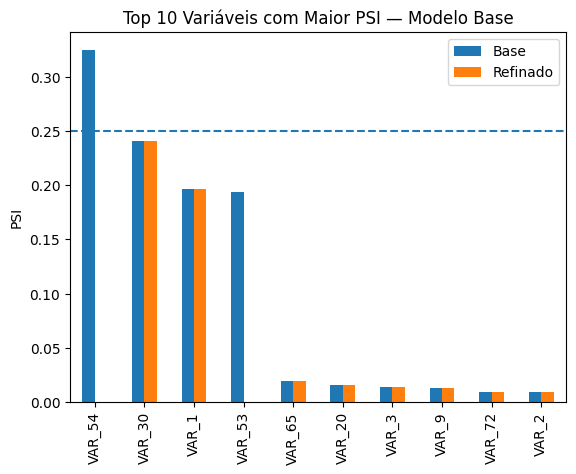

In [25]:
df_psi_vars.sort_values("Base", ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Variáveis com Maior PSI — Modelo Base")
plt.ylabel("PSI")
plt.axhline(0.25, linestyle="--")
plt.show()


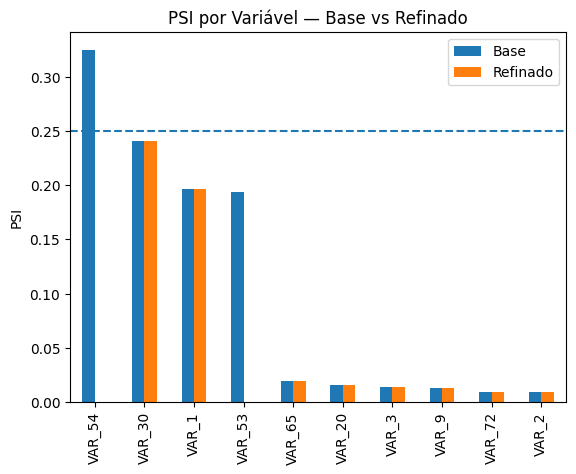

In [26]:
df_psi_vars.loc[
    df_psi_vars.sort_values("Base", ascending=False).head(10).index
].plot(kind="bar")

plt.title("PSI por Variável — Base vs Refinado")
plt.ylabel("PSI")
plt.axhline(0.25, linestyle="--")
plt.show()


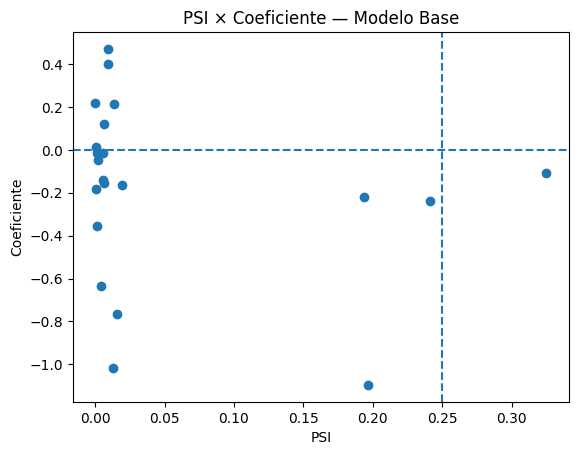

In [29]:
df_psi_coef = psi["Modelo_Base"]["variaveis"]["treino_val"]

plt.scatter(
    df_psi_coef["PSI"],
    df_psi_coef["coeficiente"]
)

plt.axvline(0.25, linestyle="--")
plt.axhline(0, linestyle="--")
plt.xlabel("PSI")
plt.ylabel("Coeficiente")
plt.title("PSI × Coeficiente — Modelo Base")
plt.show()
